#Step 1: Import libraries

In [ ]:
import numpy as np                #for calculations
import pandas as pd               #for data manipulation
import matplotlib.pyplot as plt   #for visualizations
import seaborn as sns             #for advanced visualizations

In [ ]:
pd.set_option('display.max_columns', None) #to avoid truncating columns
pd.set_option('display.max_rows', None) #to avoid truncating rows

#Step 2: Import the Dataset

In [ ]:
#Upload Kaggle JSON file
from google.colab import files
files.upload()

In [ ]:
#Creates a .kaggle directory in the home folder.
!mkdir -p ~/.kaggle

#Copies kaggle.json API key into the .kaggle directory.
!cp kaggle.json ~/.kaggle/

#Secures the API key by setting read/write permissions only for the owner.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloads the dataset from Kaggle to Colab
!kaggle datasets download -d uciml/mushroom-classification

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 106MB/s]


In [ ]:
#Unzips the dataset(The dataset is downloaded as a compressed file by default)
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [ ]:
df = pd.read_csv('mushrooms.csv')

#Step 3: Exploratory Data Analysis

##3.1 Overview

In [ ]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe(exclude=[np.number])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#get unique values in each column
for col in df.columns:
  print(f'{col}: {df[col].unique()}')
  # with counts of each
  print(df[col].value_counts())
  print()

class: ['p' 'e']
class
e    4208
p    3916
Name: count, dtype: int64

cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface: ['s' 'y' 'f' 'g']
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises: ['t' 'f']
bruises
f    4748
t    3376
Name: count, dtype: int64

odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment: ['f' 'a']
gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing: ['c' 'w']
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size: ['n' 'b']
gill-size
b    5612
n    2512
Name: count, dtype: int64

gill

### Class distribution

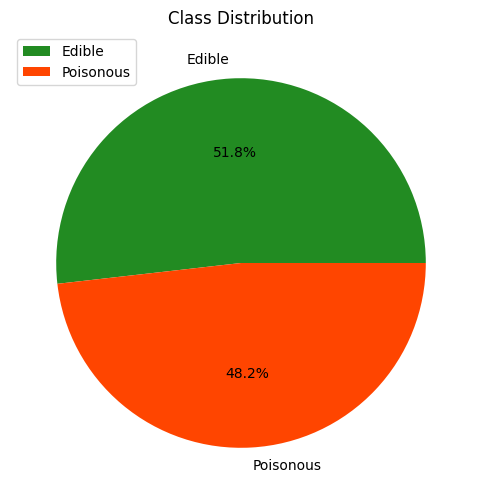

In [ ]:
# Calculate the value counts for 'Class Distribution'
class_counts = df['class'].value_counts()

# Create a mapping dictionary for labels
class_label_mapping = {'p': 'Poisonous', 'e': 'Edible'}

# Get the labels from the index and replace them using the mapping
class_labels = [class_label_mapping.get(item, item) for item in class_counts.index]


# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=0, colors=['forestgreen', 'orangered'])

# Add a title
plt.title('Class Distribution')

#Add a legend
plt.legend(class_labels, loc='upper left')

# Display the chart
plt.show()

###Cap Shape

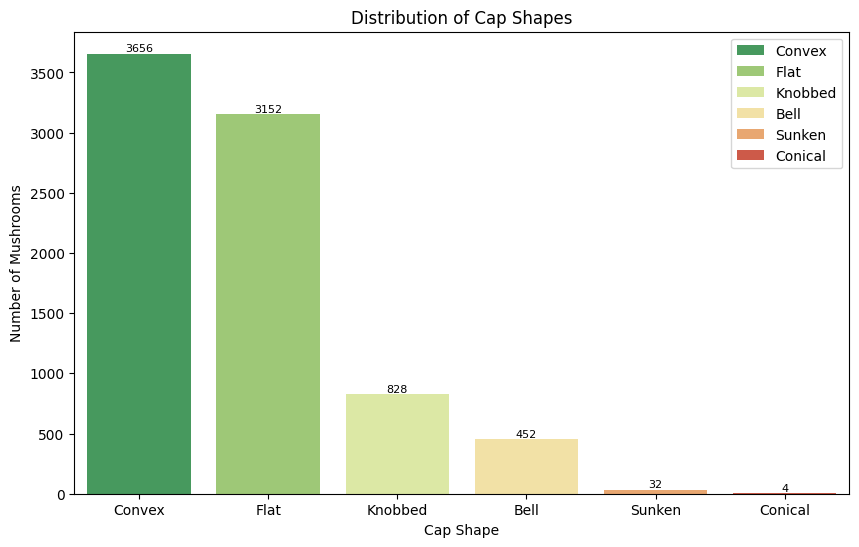

In [ ]:
# Calculate the value counts
cap_shape_counts = df['cap-shape'].value_counts()

# Create a mapping dictionary
cap_shape_mapping = {'b': 'Bell','c': 'Conical','x': 'Convex','f': 'Flat','k': 'Knobbed','s': 'Sunken'}

# Replace index labels using the mapping
cap_shape_labels = [cap_shape_mapping.get(item, item) for item in cap_shape_counts.index]

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cap_shape_labels,y=cap_shape_counts.values,hue=cap_shape_labels,palette='RdYlGn_r',legend=True)

# Add labels and title
plt.title('Distribution of Cap Shapes')
plt.xlabel('Cap Shape')
plt.ylabel('Number of Mushrooms')
plt.xticks()

# Annotate each bar with the count
for i, count in enumerate(cap_shape_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()


###Cap Surface

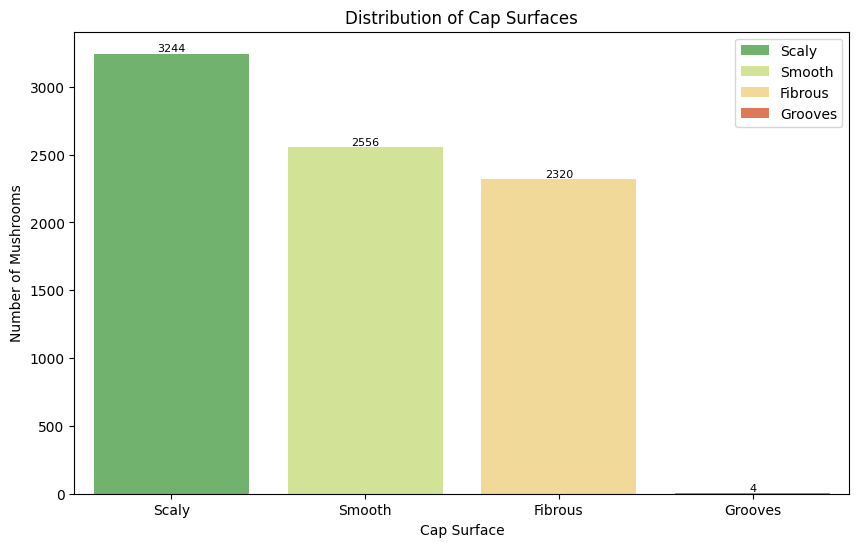

In [ ]:
# Calculate the value counts
cap_surface_counts = df['cap-surface'].value_counts()

# Create a mapping dictionary
cap_surface_mapping = {'f': 'Fibrous','g': 'Grooves','y': 'Scaly','s': 'Smooth'}

# Replace index labels using the mapping
cap_surface_labels = [cap_surface_mapping.get(item, item) for item in cap_surface_counts.index]

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cap_surface_labels,y=cap_surface_counts.values,hue=cap_surface_labels,palette='RdYlGn_r',legend=True)

# Add labels and title
plt.title('Distribution of Cap Surfaces')
plt.xlabel('Cap Surface')
plt.ylabel('Number of Mushrooms')
plt.xticks()

# Annotate each bar with the count
for i, count in enumerate(cap_surface_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()


###Cap Color

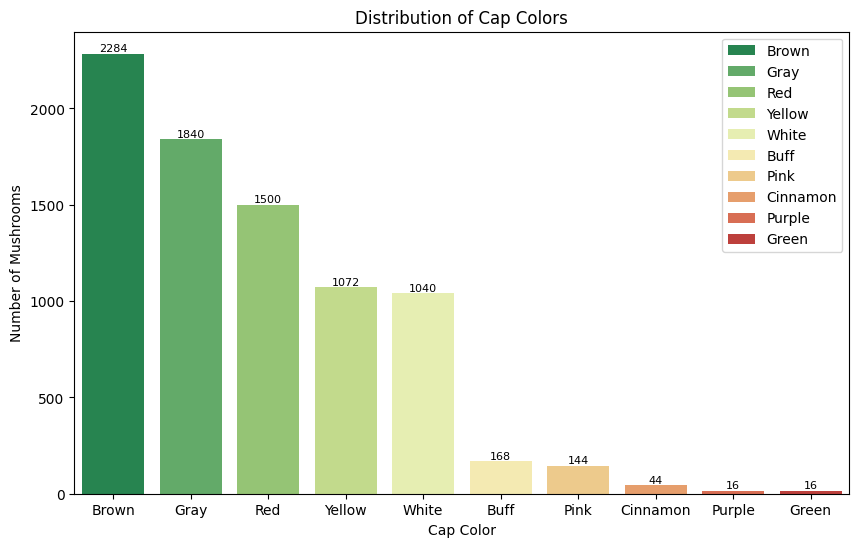

In [ ]:
#Calculate the value counts
cap_color_counts = df['cap-color'].value_counts()

#Create a mapping dictionary
cap_color_mapping = {'n': 'Brown','b': 'Buff','c': 'Cinnamon','g': 'Gray','r': 'Green','p': 'Pink','u': 'Purple','e': 'Red','w': 'White','y': 'Yellow'}

# Replace index labels using the mapping
cap_color_labels = [cap_color_mapping.get(item, item) for item in cap_color_counts.index]

#Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cap_color_labels,y=cap_color_counts.values,hue=cap_color_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(cap_color_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

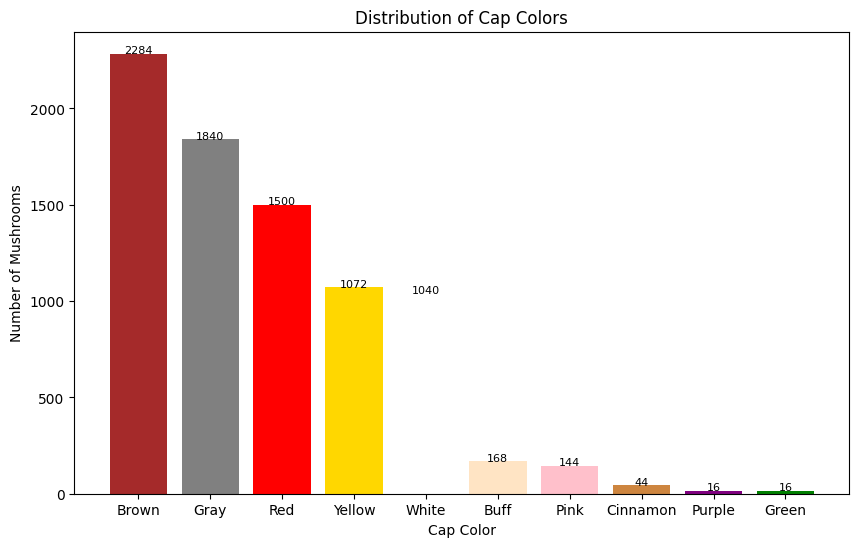

In [ ]:
#Calculate the value counts
cap_color_counts = df['cap-color'].value_counts()

#Create a mapping dictionary
cap_color_mapping = {'n': 'Brown','b': 'Buff','c': 'Cinnamon','g': 'Gray','r': 'Green','p': 'Pink','u': 'Purple','e': 'Red','w': 'White','y': 'Yellow'}

# Color palette for each cap color
cap_color_palette = {
    'n': 'brown',
    'b': 'bisque',
    'c': 'peru',
    'g': 'gray',
    'r': 'green',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'gold'
}

# Create list of colors in the same order as the bars
colors = [cap_color_palette[c] for c in cap_color_counts.index]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(
    [cap_color_mapping[c] for c in cap_color_counts.index],
    cap_color_counts.values,
    color=colors
)

# Labels and title
plt.title('Distribution of Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Number of Mushrooms')

# Annotate bars
for i, count in enumerate(cap_color_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=8)

plt.show()



###Bruises

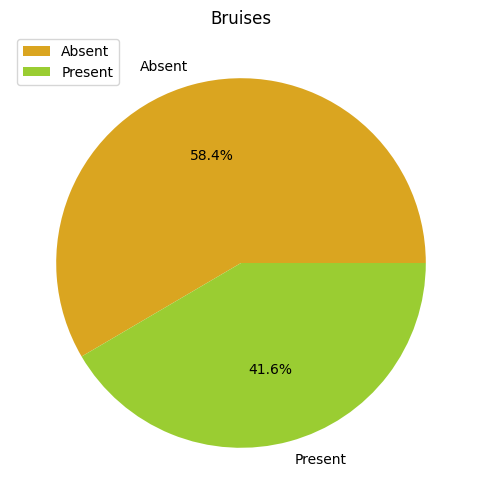

In [ ]:
#Calculate the value counts
bruises_counts = df['bruises'].value_counts()

#Create a mapping dictionary
bruises_mapping = {'t':"Present",'f':"Absent"}

#Replace index labels using the mapping
bruises_labels = [bruises_mapping.get(item, item) for item in bruises_counts.index]

#Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(bruises_counts, labels=bruises_labels, autopct='%1.1f%%', startangle=0, colors=['goldenrod', 'yellowgreen'])

#Add a title
plt.title('Bruises')

#Add a legend
plt.legend(bruises_labels, loc='upper left')

#Display the chart
plt.show()

###Odor

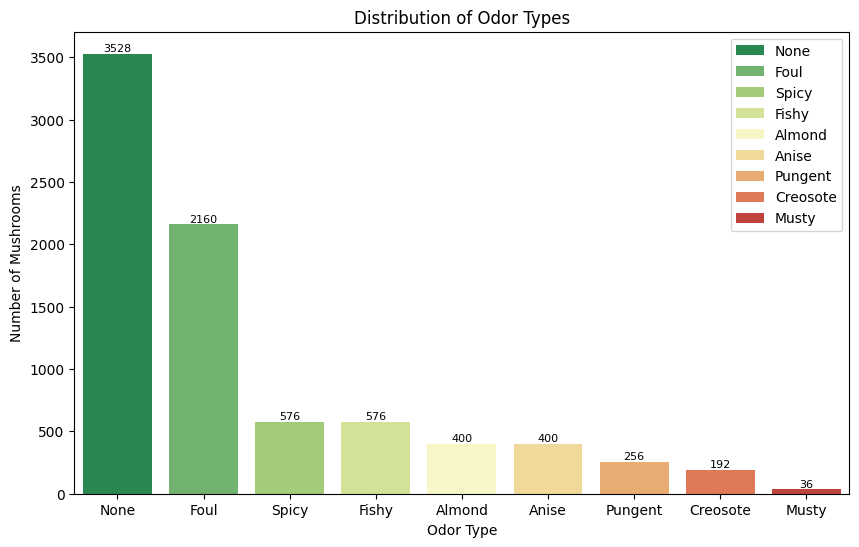

In [ ]:
#Calculate the value counts
odor_counts = df['odor'].value_counts()

#Create a mapping dictionary
odor_mapping = {'a': 'Almond','l': 'Anise','c': 'Creosote','y': 'Fishy', 'f': 'Foul','m': 'Musty','n': 'None','p': 'Pungent','s': 'Spicy'}

#Replace index labels using the mapping
odor_labels = [odor_mapping.get(item, item) for item in odor_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=odor_labels,y=odor_counts.values,hue=odor_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Odor Types')
plt.xlabel('Odor Type')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(odor_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Gill Attachment
There were no descending or notch-gilled mushrooms present in the dataset, so they were excluded from the mapping (though they were included in the dataset's description by UCI)

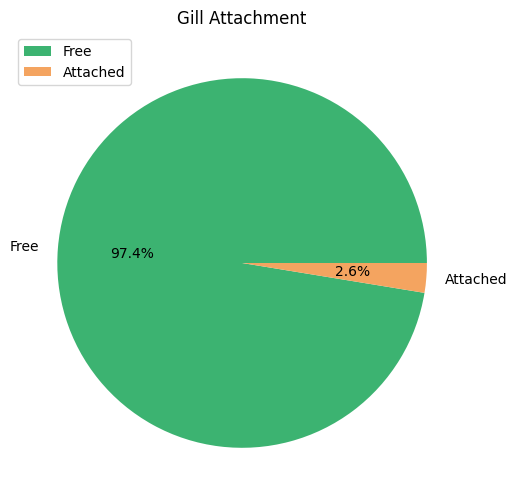

In [ ]:
#Calculate the value counts
gill_attachment_counts = df['gill-attachment'].value_counts()

#Create a mapping dictionary
gill_attachment_mapping = {'a': 'Attached','f': 'Free','n': 'Notched', 'd':'Descending'}

#Replace index labels using the mapping
gill_attachment_labels = [gill_attachment_mapping.get(item,item) for item in gill_attachment_counts.index]

#Create a piechart
plt.figure(figsize=(6,6))
plt.pie(gill_attachment_counts, labels=gill_attachment_labels, autopct='%1.1f%%', startangle=0, colors=['mediumseagreen', 'sandybrown'])

#Add a title
plt.title('Gill Attachment')

#Add a legend
plt.legend(gill_attachment_labels, loc='upper left')

#Display the chart
plt.show()

###Gill Spacing
Similarly, gill spacing of mushrooms was also limited to close and crowded, with no instances of distant spacing. Therefore, it was excluded in the mapping.

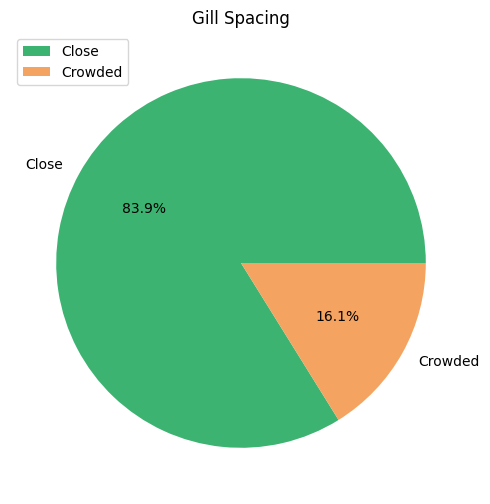

In [ ]:
#Calculate the value counts
gill_spacing_counts = df['gill-spacing'].value_counts()

#Create a mapping dictionary
gill_spacing_mapping = {'c': 'Close','w': 'Crowded', 'd':'Distant'}

#Replace index labels using the mapping
gill_spacing_labels = [gill_spacing_mapping.get(item,item) for item in gill_spacing_counts.index]

#Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(gill_spacing_counts, labels=gill_spacing_labels, autopct='%1.1f%%', startangle=0, colors=['mediumseagreen','sandybrown'])

#Add a title
plt.title('Gill Spacing')

#Add a legend
plt.legend(gill_spacing_labels, loc='upper left')

#Display the chart
plt.show()

###Gill size

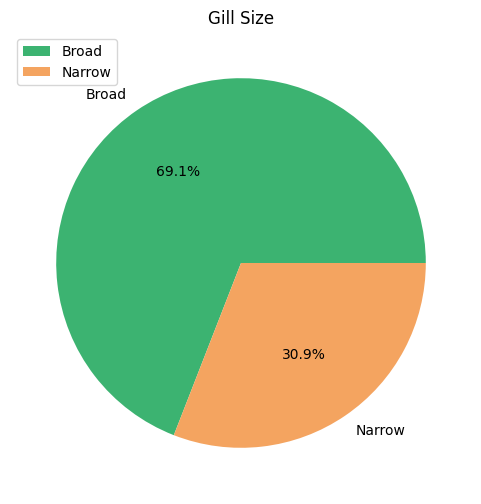

In [ ]:
#Calculate the value counts
gill_size_counts = df['gill-size'].value_counts()

#Create a mapping dictionary
gill_size_mapping = {'b': 'Broad','n': 'Narrow'}

#Replace index labels using the mapping
gill_size_labels = [gill_size_mapping.get(item,item) for item in gill_size_counts.index]

#Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(gill_size_counts, labels=gill_size_labels, autopct='%1.1f%%', startangle=0, colors=['mediumseagreen','sandybrown'])

#Add the title
plt.title('Gill Size')

#Add a legend
plt.legend(gill_size_labels, loc='upper left')

#Display the chart
plt.show()

###Gill Color

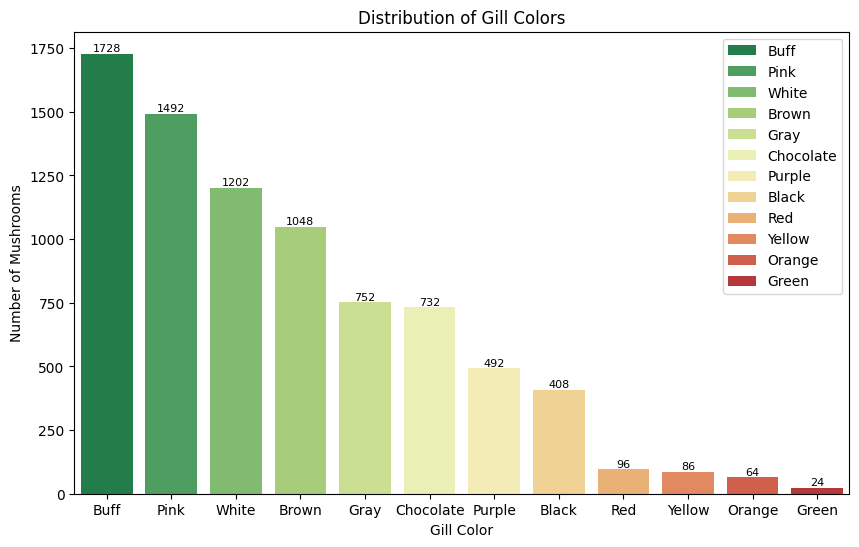

In [ ]:
#Calculate the value counts
gill_color_counts = df['gill-color'].value_counts()

#Create a mapping dictionary
gill_color_mapping = {'k': 'Black','n': 'Brown','b': 'Buff','h': 'Chocolate', 'g': 'Gray','r': 'Green', 'o': 'Orange','p': 'Pink','u': 'Purple','e': 'Red','w': 'White','y': 'Yellow'}

#Replace index labels using the mapping
gill_color_labels = [gill_color_mapping.get(item,item) for item in gill_color_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gill_color_labels,y=gill_color_counts.values,hue=gill_color_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Gill Colors')
plt.xlabel('Gill Color')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(gill_color_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Stalk Shape

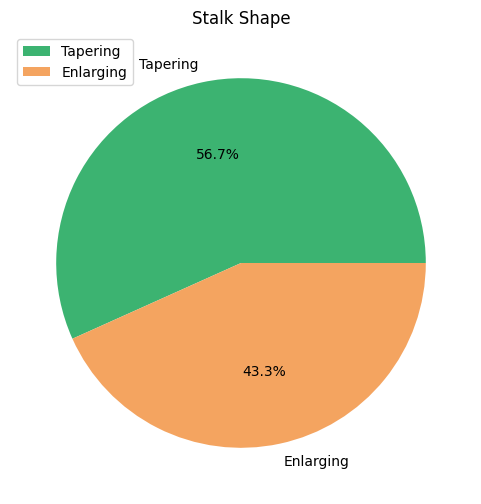

In [ ]:
#Calculate the value counts
stalk_shape_counts = df['stalk-shape'].value_counts()

#Create a mapping dictionary
stalk_shape_mapping = {'e': 'Enlarging','t': 'Tapering'}

#Replace index labels using the mapping
stalk_shape_labels = [stalk_shape_mapping.get(item,item) for item in stalk_shape_counts.index]

#Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(stalk_shape_counts, labels=stalk_shape_labels, autopct='%1.1f%%', startangle=0, colors=['mediumseagreen','sandybrown'])

#Add a title
plt.title('Stalk Shape')

#Add a legend
plt.legend(stalk_shape_labels, loc='upper left')

#Display the chart
plt.show()

###Stalk Root
No instances of Rhizomorphs or Cupped stalks were present, so they were excluded in the visualization

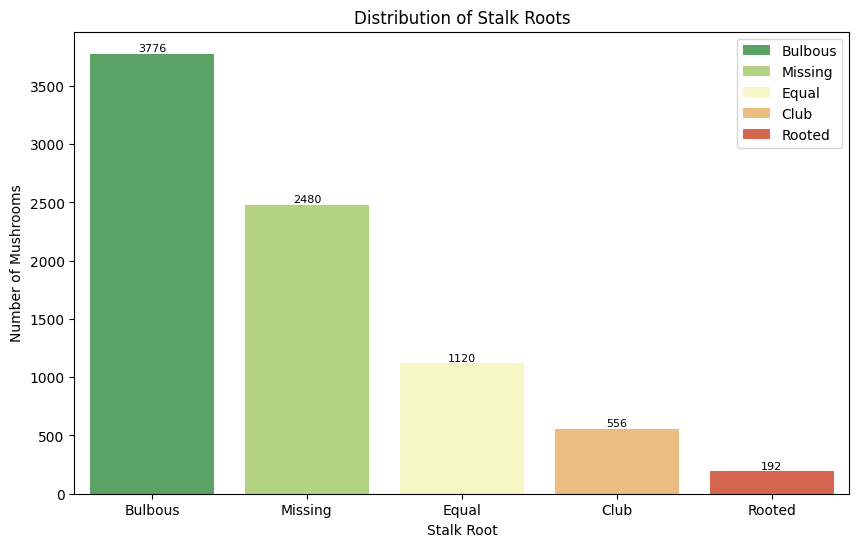

In [ ]:
#Calculate the value counts
stalk_root_counts = df['stalk-root'].value_counts()

#Create a mapping dictionary
stalk_root_mapping = {'b': 'Bulbous', 'c': 'Club', 'u': 'Cup', 'e': 'Equal', 'z': 'Rhizomorphs', 'r': 'Rooted', '?': 'Missing'}

#Replace index labels using the mapping
stalk_root_labels = [stalk_root_mapping.get(item,item) for item in stalk_root_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stalk_root_labels,y=stalk_root_counts.values,hue=stalk_root_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Stalk Roots')
plt.xlabel('Stalk Root')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(stalk_root_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Stalk Surface Above Ring

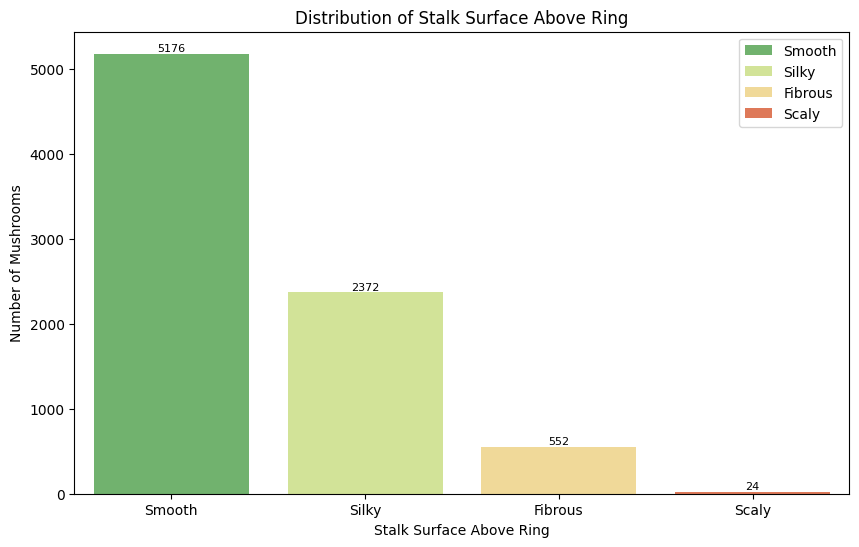

In [ ]:
#Calculate the value counts
stalk_surface_above_ring_counts = df['stalk-surface-above-ring'].value_counts()

#Create a mapping dictionary
stalk_surface_above_ring_mapping = {'f': 'Fibrous','y': 'Scaly','k': 'Silky','s': 'Smooth'}

#Replace index labels using the mapping
stalk_surface_above_ring_labels = [stalk_surface_above_ring_mapping.get(item,item) for item in stalk_surface_above_ring_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stalk_surface_above_ring_labels,y=stalk_surface_above_ring_counts.values,hue=stalk_surface_above_ring_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Stalk Surface Above Ring')
plt.xlabel('Stalk Surface Above Ring')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(stalk_surface_above_ring_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Stalk Surface Below Ring

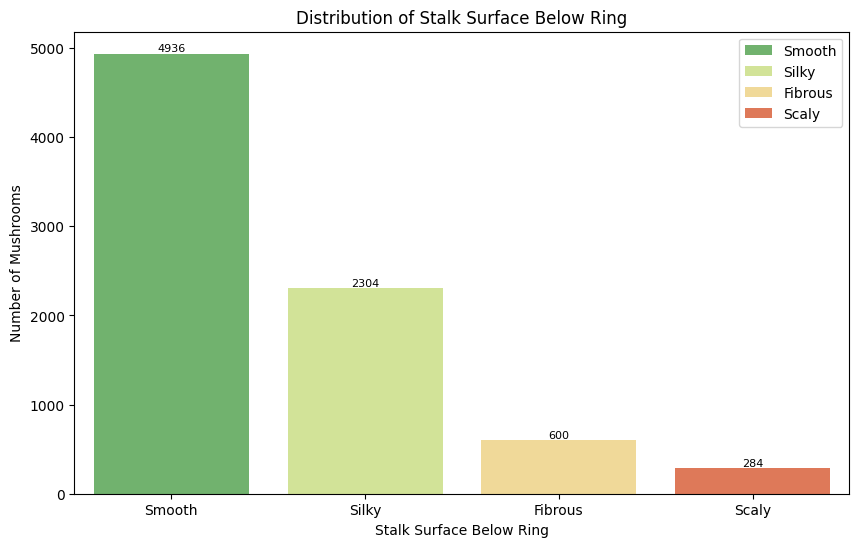

In [ ]:
#Calculate the value counts
stalk_surface_below_ring_counts = df['stalk-surface-below-ring'].value_counts()

#Create a mapping dictionary
stalk_surface_below_ring_mapping = {'f': 'Fibrous','y': 'Scaly','k': 'Silky','s':'Smooth'}

#Replace index labels using the mapping
stalk_surface_below_ring_labels = [stalk_surface_below_ring_mapping.get(item,item) for item in stalk_surface_below_ring_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stalk_surface_below_ring_labels,y=stalk_surface_below_ring_counts.values,hue=stalk_surface_below_ring_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Stalk Surface Below Ring')
plt.xlabel('Stalk Surface Below Ring')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(stalk_surface_below_ring_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Stalk Color Above Ring

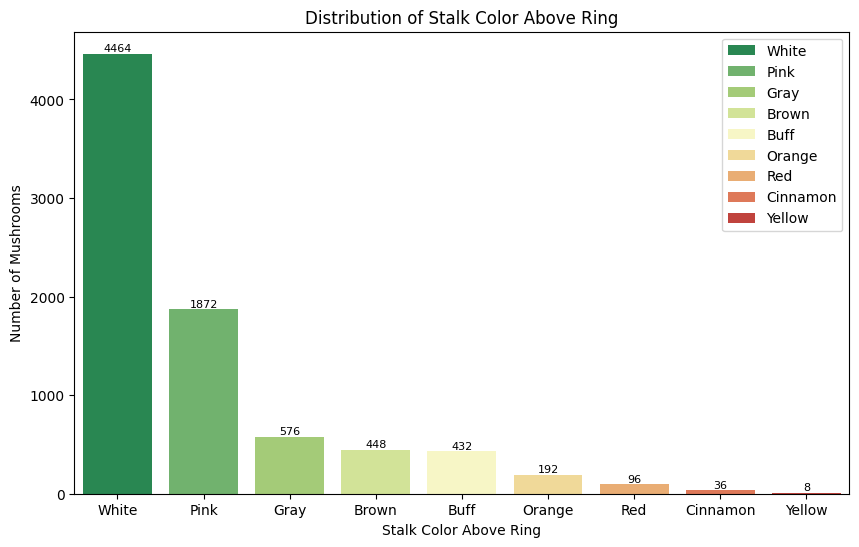

In [ ]:
#Calculate the value counts
stalk_color_above_ring_counts = df['stalk-color-above-ring'].value_counts()

#Create a mapping dictionary
stalk_color_above_ring_mapping = {'n': 'Brown','b': 'Buff','c': 'Cinnamon','g': 'Gray','o': 'Orange','p': 'Pink','e': 'Red','w': 'White','y': 'Yellow'}

#Replace index labels using the mapping
stalk_color_above_ring_labels = [stalk_color_above_ring_mapping.get(item,item) for item in stalk_color_above_ring_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stalk_color_above_ring_labels,y=stalk_color_above_ring_counts.values,hue=stalk_color_above_ring_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Stalk Color Above Ring')
plt.xlabel('Stalk Color Above Ring')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(stalk_color_above_ring_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Stalk Color Below Ring

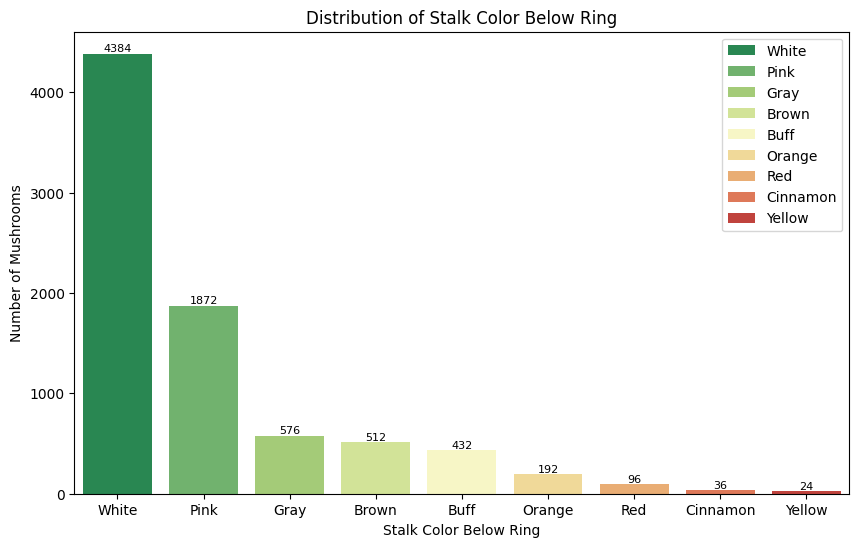

In [ ]:
#Calculate the value counts
stalk_color_below_ring_counts = df['stalk-color-below-ring'].value_counts()

#Create a mapping dictionary
stalk_color_below_ring_mapping = {'n': 'Brown','b': 'Buff','c': 'Cinnamon','g': 'Gray','o': 'Orange','p': 'Pink','e': 'Red','w': 'White','y': 'Yellow'}

#Replace index labels using the mapping
stalk_color_below_ring_labels = [stalk_color_below_ring_mapping.get(item,item) for item in stalk_color_below_ring_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stalk_color_below_ring_labels,y=stalk_color_below_ring_counts.values,hue=stalk_color_below_ring_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Stalk Color Below Ring')
plt.xlabel('Stalk Color Below Ring')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(stalk_color_below_ring_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Veil Type
There were no universally-veiled mushroom instances present in the dataset.

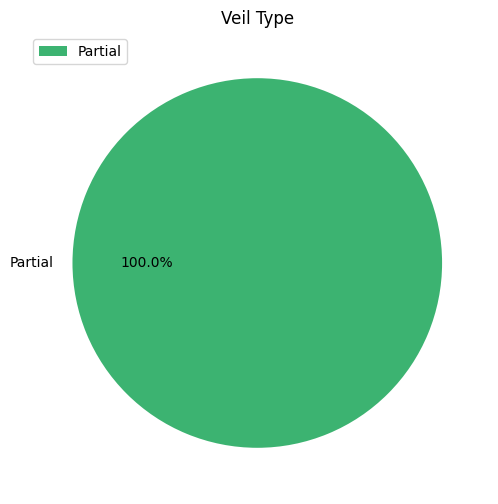

In [ ]:
#Calculate the value counts
veil_type_counts = df['veil-type'].value_counts()

#Create a mapping dictionary
veil_type_mapping = {'p': 'Partial','u': 'Universal'}

#Replace index labels using the mapping
veil_type_labels = [veil_type_mapping.get(item,item) for item in veil_type_counts.index]

#Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(veil_type_counts, labels=veil_type_labels, autopct='%1.1f%%', startangle=0, colors=['mediumseagreen','sandybrown'])

#Add a title
plt.title('Veil Type')

#Add a legend
plt.legend(veil_type_labels, loc='upper left')

#Display the chart
plt.show()

###Veil Color

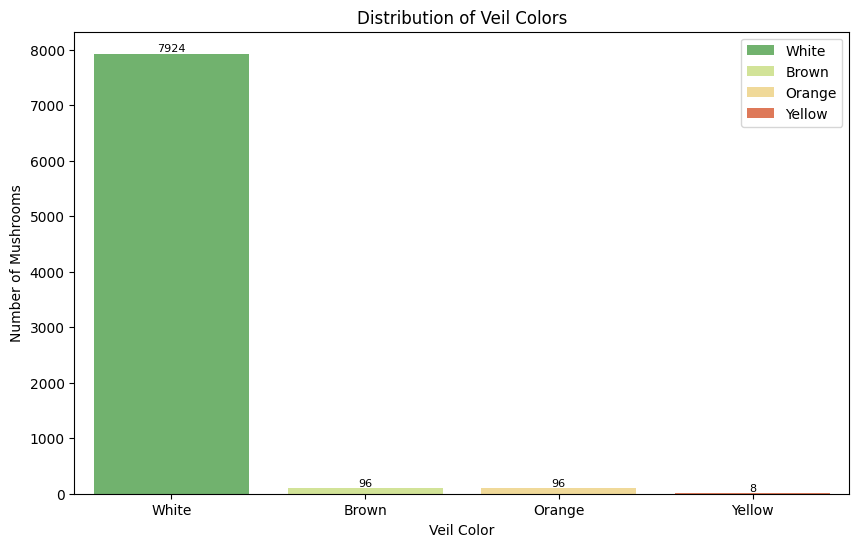

In [ ]:
#brown=n,orange=o,white=w,yellow=y
#Calculate the value counts
veil_color_counts = df['veil-color'].value_counts()

#Create a mapping dictionary
veil_color_mapping = {'n': 'Brown','o': 'Orange','w': 'White','y': 'Yellow'}

#Replace index labels using the mapping
veil_color_labels = [veil_color_mapping.get(item,item) for item in veil_color_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=veil_color_labels,y=veil_color_counts.values,hue=veil_color_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Veil Colors')
plt.xlabel('Veil Color')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(veil_color_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Ring Number

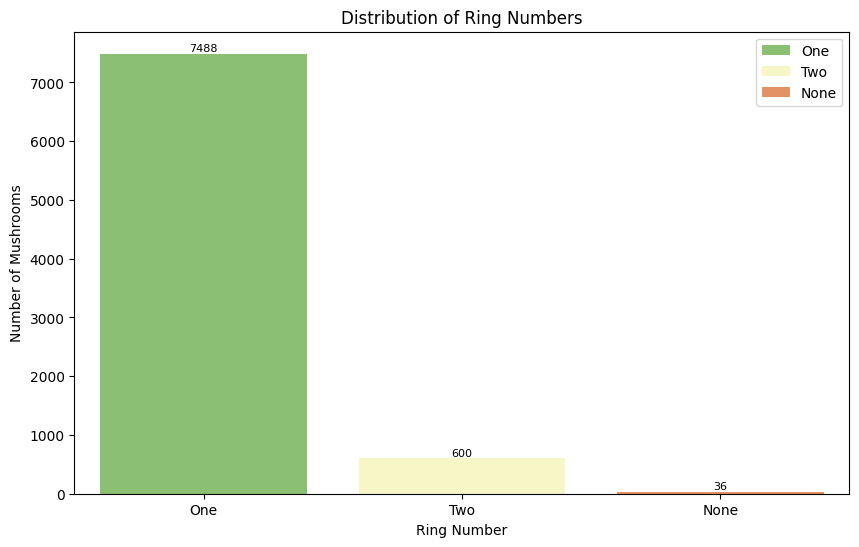

In [ ]:
#Calculate the value counts
ring_number_counts = df['ring-number'].value_counts()

#Create a mapping dictionary
ring_number_mapping = {'n': 'None','o': 'One','t': 'Two'}

#Replace index labels using the mapping
ring_number_labels = [ring_number_mapping.get(item,item) for item in ring_number_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ring_number_labels,y=ring_number_counts.values,hue=ring_number_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Ring Numbers')
plt.xlabel('Ring Number')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(ring_number_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Ring Type
There were no instances of cobwebby, sheathing or zone ring-types mushrooms in the dataset.

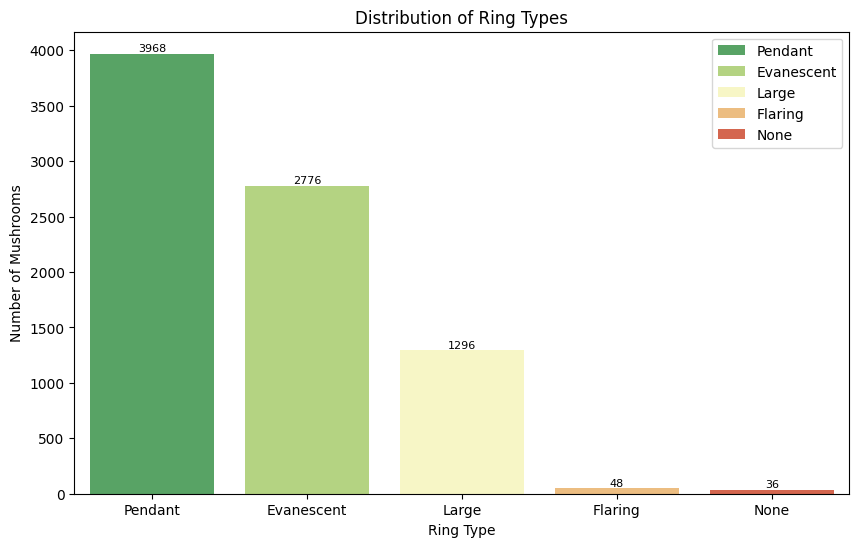

In [ ]:
#Calculate the value counts
ring_type_counts = df['ring-type'].value_counts()

#Create a mapping dictionary
ring_type_mapping = {'c': 'Cobwebby','e': 'Evanescent','f': 'Flaring','l': 'Large','n': 'None','p': 'Pendant','s': 'Sheathing','z': 'Zone'}

#Replace index labels using the mapping
ring_type_labels = [ring_type_mapping.get(item,item) for item in ring_type_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ring_type_labels,y=ring_type_counts.values,hue=ring_type_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Ring Types')
plt.xlabel('Ring Type')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(ring_type_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Spore Print Color

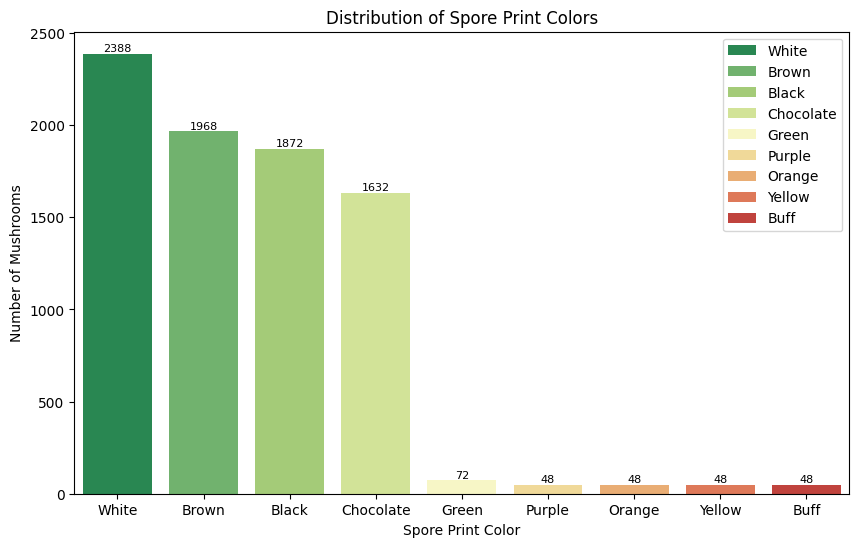

In [ ]:
#Calculate the value counts
spore_print_color_counts = df['spore-print-color'].value_counts()

#Create a mapping dictionary
spore_print_color_mapping = {'k': 'Black','n': 'Brown','b': 'Buff','h': 'Chocolate', 'r': 'Green','o': 'Orange','u': 'Purple','w': 'White','y': 'Yellow'}

#Replace index labels using the mapping
spore_print_color_labels = [spore_print_color_mapping.get(item,item) for item in spore_print_color_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=spore_print_color_labels,y=spore_print_color_counts.values,hue=spore_print_color_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Spore Print Colors')
plt.xlabel('Spore Print Color')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(spore_print_color_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Population

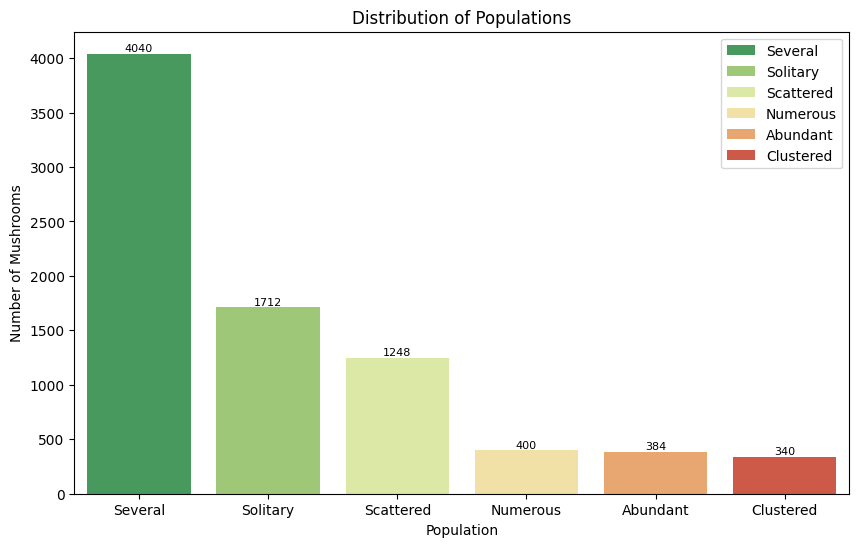

In [ ]:
#Calculate the value counts
population_counts = df['population'].value_counts()

#Create a mapping dictionary
population_mapping = {'a': 'Abundant','c': 'Clustered','n': 'Numerous','s': 'Scattered','v': 'Several','y': 'Solitary'}

#Replace index labels using the mapping
population_labels = [population_mapping.get(item,item) for item in population_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=population_labels,y=population_counts.values,hue=population_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Populations')
plt.xlabel('Population')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(population_counts.values):
  ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()

###Habitat

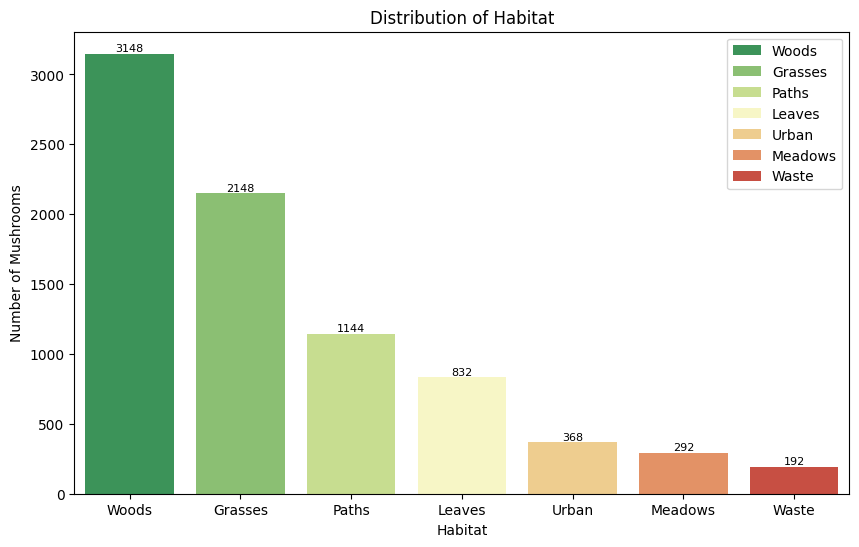

In [ ]:
#grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
#Calculate the value counts
habitat_counts = df['habitat'].value_counts()

#Create a mapping dictionary
habitat_mapping = {'g': 'Grasses','l': 'Leaves','m': 'Meadows','p': 'Paths','u': 'Urban','w': 'Waste','d': 'Woods'}

#Replace index labels using the mapping
habitat_labels = [habitat_mapping.get(item,item) for item in habitat_counts.index]

#Create a barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=habitat_labels,y=habitat_counts.values,hue=habitat_labels,palette='RdYlGn_r',legend=True)

#Add labels and title
plt.title('Distribution of Habitat')
plt.xlabel('Habitat')
plt.ylabel('Number of Mushrooms')
plt.xticks()

#Annotate each bar with the count
for i, count in enumerate(habitat_counts.values):
  ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

#Display the plot
plt.show()